In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load datasets

df_train = pd.read_csv('train_dataset.csv')
df_test = pd.read_csv('test_dataset.csv')

In [3]:
# Display basic info

df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [4]:
# Check for missing values in datasets

df_train.isnull().sum()
df_test.isnull().sum()

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             19
dtype: int64

In [5]:
# Remove rows with missing values in the target column

df_train.dropna(subset=['Arrival Delay in Minutes'], inplace=True)
df_test.dropna(subset=['Arrival Delay in Minutes'], inplace=True)

In [6]:
# Display dataset information after removing missing values

df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9972 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 9972 non-null   int64  
 1   Gender                             9972 non-null   object 
 2   Customer Type                      9972 non-null   object 
 3   Age                                9972 non-null   int64  
 4   Type of Travel                     9972 non-null   object 
 5   Class                              9972 non-null   object 
 6   Flight Distance                    9972 non-null   int64  
 7   Inflight wifi service              9972 non-null   int64  
 8   Departure/Arrival time convenient  9972 non-null   int64  
 9   Ease of Online booking             9972 non-null   int64  
 10  Gate location                      9972 non-null   int64  
 11  Food and drink                     9972 non-null   int64  
 1

In [7]:
# Identify categorical columns

categorical_columns = df_train.select_dtypes(include=['object']).columns

In [8]:
# Display unique values for categorical columns

for col in categorical_columns:
    print(f'{col}: {df_train[col].unique()}')
    print(f'{col}: {df_test[col].unique()}')

Gender: ['Male' 'Female']
Gender: ['Female' 'Male']
Customer Type: ['disloyal Customer' 'Loyal Customer']
Customer Type: ['Loyal Customer' 'disloyal Customer']
Type of Travel: ['Business travel' 'Personal Travel']
Type of Travel: ['Personal Travel' 'Business travel']
Class: ['Eco' 'Business' 'Eco Plus']
Class: ['Eco' 'Business' 'Eco Plus']


In [9]:
# Make copies to avoid modifying original datasets

train = df_train.copy()
test = df_test.copy()

In [10]:
# Label Encoding for categorical features

label_encoders = {}
for col in categorical_columns:
    unique_values = sorted(set(train[col].unique()).union(set(test[col].unique())))
    encoder = LabelEncoder()
    encoder.fit(unique_values)
    
    train[col] = encoder.transform(train[col])
    test[col] = encoder.transform(test[col])
    
    label_encoders[col] = encoder

In [11]:
# Correlation matrix visualization

corr_matrix = train.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,1.000000,0.005929,0.007156,0.002878,0.009134,0.013759,0.007853,0.024753,0.014624,0.020283,0.025474,0.006694,0.007441,0.002375,0.003299,0.004331,0.012200,0.001332,0.004918,0.013880,0.004823,0.001747,0.002255,0.002581
Gender,0.005929,1.000000,0.025878,0.004857,0.021716,0.010296,0.018321,0.009430,0.015777,0.007286,0.018572,0.004971,0.045541,0.045894,0.009193,0.004123,0.020428,0.038618,0.020024,0.047381,0.008620,0.031017,0.027431,0.002007
Customer Type,0.007156,0.025878,1.000000,0.291629,0.279872,0.059022,0.226364,0.003997,0.196356,0.018876,0.000906,0.071631,0.196076,0.174425,0.126152,0.060369,0.070866,0.014623,0.031500,0.026806,0.101561,0.009308,0.006917,0.181535
Age,0.002878,0.004857,0.291629,1.000000,0.076443,0.143041,0.111871,0.021436,0.035746,0.027670,0.011687,0.022590,0.216314,0.171197,0.098313,0.073085,0.061264,0.040661,0.038299,0.037961,0.063895,0.014961,0.019086,0.145327
Type of Travel,0.009134,0.021716,0.279872,0.076443,1.000000,0.493248,0.276722,0.099688,0.242733,0.113699,0.036133,0.076563,0.241065,0.149900,0.185632,0.081660,0.153700,0.036121,0.006020,0.038903,0.109543,0.006951,0.007061,0.481773
Class,0.013759,0.010296,0.059022,0.143041,0.493248,1.000000,0.432679,0.008706,0.090023,0.078442,0.009829,0.080309,0.307075,0.215583,0.197713,0.222206,0.218090,0.187610,0.168469,0.163500,0.133089,0.008667,0.003210,0.464452
Flight Distance,0.007853,0.018321,0.226364,0.111871,0.276722,0.432679,1.000000,0.002958,0.020414,0.053006,0.017998,0.064775,0.213875,0.169740,0.149992,0.114869,0.140069,0.073288,0.066865,0.058505,0.100044,0.010690,0.002901,0.298484
Inflight wifi service,0.024753,0.009430,0.003997,0.021436,0.099688,0.008706,0.002958,1.000000,0.361957,0.730667,0.362888,0.120038,0.438054,0.106971,0.198965,0.134162,0.173526,0.123705,0.039911,0.113733,0.119762,0.020197,0.023086,0.277497
Departure/Arrival time convenient,0.014624,0.015777,0.196356,0.035746,0.242733,0.090023,0.020414,0.361957,1.000000,0.456414,0.479226,0.002560,0.046159,0.002439,0.006724,0.070528,0.027980,0.072676,0.078142,0.062222,0.001685,0.010812,0.008985,0.067758
Ease of Online booking,0.020283,0.007286,0.018876,0.027670,0.113699,0.078442,0.053006,0.730667,0.456414,1.000000,0.476951,0.017039,0.387716,0.016346,0.043668,0.053859,0.117073,0.044287,0.013498,0.031895,0.006958,0.000763,0.003715,0.164025


In [12]:
# Display correlation with target variable

print(train.corrwith(train['satisfaction']).abs().sort_values(ascending=False))

satisfaction                         1.000000
Online boarding                      0.504671
Type of Travel                       0.481773
Class                                0.464452
Inflight entertainment               0.401109
Seat comfort                         0.342061
On-board service                     0.327361
Leg room service                     0.325405
Cleanliness                          0.310046
Flight Distance                      0.298484
Inflight wifi service                0.277497
Baggage handling                     0.248839
Inflight service                     0.240580
Checkin service                      0.232337
Food and drink                       0.206881
Customer Type                        0.181535
Ease of Online booking               0.164025
Age                                  0.145327
Departure/Arrival time convenient    0.067758
Arrival Delay in Minutes             0.048650
Departure Delay in Minutes           0.043456
Gate location                     

In [13]:
# Define features and target variable

X = train.drop(columns=['id', 'satisfaction'])
y = train['satisfaction']

In [14]:
# Split data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train the XGBoost classifier

model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [16]:
# Make predictions

y_pred = model.predict(X_test)

In [17]:
# Model evaluation

print(classification_report(y_test, y_pred))
print("Model Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1013
           1       0.96      0.95      0.95       982

    accuracy                           0.96      1995
   macro avg       0.96      0.96      0.96      1995
weighted avg       0.96      0.96      0.96      1995

Model Accuracy: 0.9553884711779449


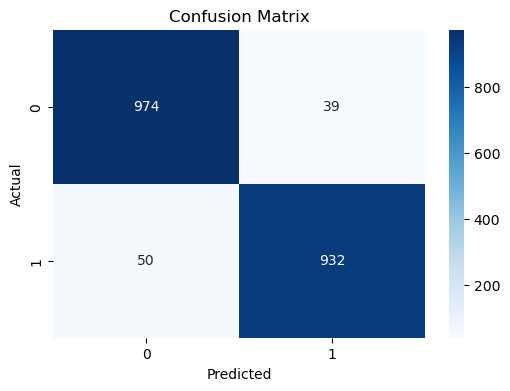

In [18]:
# Confusion matrix visualization

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="g", cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

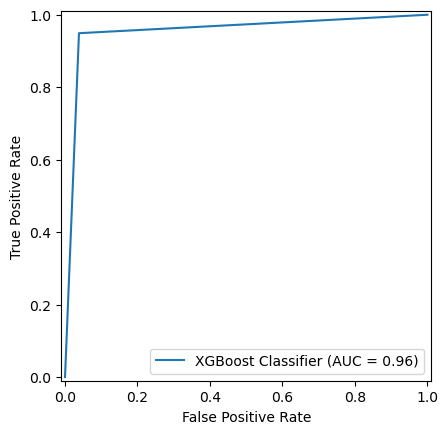

In [19]:
# ROC curve

fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='XGBoost Classifier').plot()
plt.show()

In [20]:
# Predict on test data

test_predictions = model.predict(test.drop(columns=['id']))

In [21]:
# Prepare solution file

solution = pd.DataFrame({'id': test['id'], 'satisfaction': test_predictions})
solution.to_csv('solution.csv', index=False)